In [1]:
import numpy as np
import torch
import torch.nn as nn
from pathlib import Path
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.optim as optim
import scipy.interpolate
import math
pitorch = torch.Tensor([math.pi])

In [2]:
data_folder = Path('./LJ7')
fname = "./data/sample_trajectories_0.npz"
inData = np.load(fname)
Mu2i_0 = inData['Mu2i']
Mu3i_0 = inData['Mu3i']
Mu2i_orig_0 = inData['Mu2i_orig']
Mu3i_orig_0 = inData['Mu3i_orig']

fname = "./data/sample_trajectories_1.npz"
inData = np.load(fname)
Mu2i_1 = inData['Mu2i']
Mu3i_1 = inData['Mu3i']
Mu2i_orig_1 = inData['Mu2i_orig']
Mu3i_orig_1 = inData['Mu3i_orig']

fname = "./data/sample_trajectories_2.npz"
inData = np.load(fname)
Mu2i_3 = inData['Mu2i']
Mu3i_3 = inData['Mu3i']
Mu2i_orig_3 = inData['Mu2i_orig']
Mu3i_orig_3 = inData['Mu3i_orig']

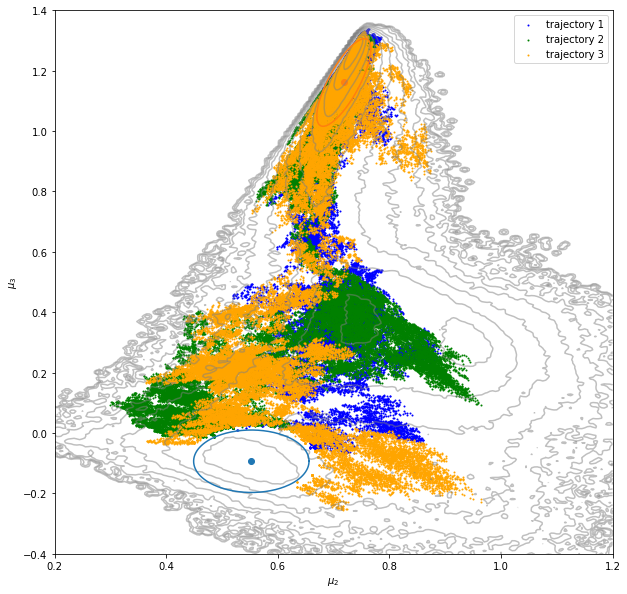

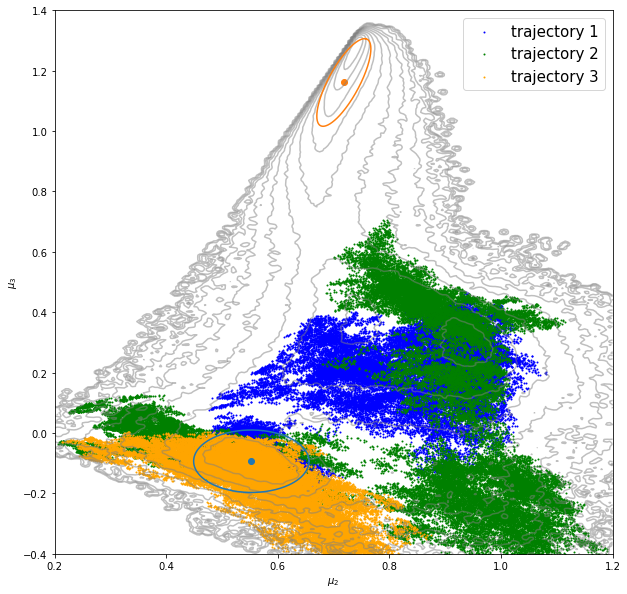

In [3]:
plt.figure(1)
plt.scatter(Mu2i_0,Mu3i_0,color = 'b', s = 1,label = 'trajectory 1')
plt.scatter(Mu2i_1,Mu3i_1,color = 'g', s = 1,label = 'trajectory 2')
plt.scatter(Mu2i_3,Mu3i_3,color = 'orange', s = 1,label = 'trajectory 3')
plt.figure(2)
plt.scatter(Mu2i_orig_0,Mu3i_orig_0,color = 'b', s = 1,label = 'trajectory 1')
plt.scatter(Mu2i_orig_1,Mu3i_orig_1,color = 'g', s = 1,label = 'trajectory 2')
plt.scatter(Mu2i_orig_3,Mu3i_orig_3,color = 'orange', s = 1,label = 'trajectory 3')

fname = data_folder/"LJ7_free_energy_grid.npz"
inData = np.load(fname)
free_energy = inData["free_energy"]
nx = inData["nx"]
ny = inData["ny"]
xmin = inData["xmin"]
xmax = inData["xmax"]
ymin = inData["ymin"]
ymax = inData["ymax"]

x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
xx, yy = np.meshgrid(x, y)


a = [0.5526,-0.0935]
b = [0.7184,1.1607]
Rx = 0.15
Ry = 0.03
theta = 5*np.pi/12

t = np.linspace(0,2*np.pi,200)
plt.figure(1)
fig = plt.gcf()
fig.set_size_inches(10, 10)
ax = plt.gca()
plt.scatter(a[0],a[1])
plt.scatter(b[0],b[1])
plt.plot(a[0]+0.1034*np.cos(t),a[1]+0.1034*np.sin(t))
plt.plot(Rx*np.cos(t)*np.cos(theta) - Ry*np.sin(t)*np.sin(theta)+b[0],
     Rx*np.cos(t)*np.sin(theta) + Ry*np.sin(t)*np.cos(theta)+b[1])
plt.contour(xx, yy, free_energy, levels=15,colors = 'gray', alpha = 0.5)

plt.xlim([0.2, 1.2])
# plt.xlim([-0.4, 1.4])
plt.ylim([-0.4, 1.4])
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.legend()
plt.rcParams.update({'font.size': 15})
# ax.set_aspect(1)
plt.savefig('./data/controlled_LJ7_beta5.png')

plt.figure(2)
fig = plt.gcf()
fig.set_size_inches(10, 10)
ax = plt.gca()
plt.scatter(a[0],a[1])
plt.scatter(b[0],b[1])
plt.plot(a[0]+0.1034*np.cos(t),a[1]+0.1034*np.sin(t))
plt.plot(Rx*np.cos(t)*np.cos(theta) - Ry*np.sin(t)*np.sin(theta)+b[0],
     Rx*np.cos(t)*np.sin(theta) + Ry*np.sin(t)*np.cos(theta)+b[1])
plt.contour(xx, yy, free_energy, levels=15,colors = 'gray', alpha = 0.5)
plt.xlim([0.2, 1.2])
# plt.xlim([-0.4, 1.4])
plt.ylim([-0.4, 1.4])
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.legend()
plt.rcParams.update({'font.size': 15})
# ax.set_aspect(1)
plt.savefig('./data/uncontrolled_LJ7_beta5.png')